# Interferon and cell cycle ignatures

In [5]:
import scanpy as sc
import muon as mu
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ssm-user/miniconda3/envs/single_cell/lib/python3

### Read MuData

In [16]:
def get_specific_gene(mdata, gene, ct):

    import seaborn as sns
    df = mdata.obs.copy()
    df = df.query(f'annotation_merged == "{ct}"')
    df['expr'] = mdata.mod['rna'][:, gene].X.todense().A1

    expr1 = df.query('pSS == 0').expr.values
    expr2 = df.query('pSS == 1').expr.values

    sns.barplot(x='pSS', y='expr', data=df)

    return expr1, expr2

get_specific_gene(mdata, 'ISG15')

TypeError: get_specific_gene() missing 1 required positional argument: 'ct'

In [ ]:
ct_list = mdata.obs.annotation_merged.drop_duplicates().tolist()

### ISG heatmap

In [263]:
selected_genes = """DDX60, DHX58, GBP1, IFI27, IFI35, IFIH1, IFIT1, IFIT2, IFIT3, IFIT5, IFITM1, IFITM3, IRF7, IRF9, ISG15, ISG20, LAMP3, MX1, OAS1, OAS2, OAS3, OASL, OTOF, SP140, STAT1, STAT2, TAP1, TRIM22, TRIM5, USP18, USP41""".split(', ')

In [264]:
ctrl_genes = ['ACTB', 'PGK1', 'GAPDH', 'PPIA', 'RPL13A', 'RPLP0', 'TUBB']
# ctrl_genes = list(np.random.choice(mdata.mod['rna'].var.index, 10))

In [265]:
selected_genes = list(set(mdata.mod['rna'].raw.var.index) & set(selected_genes)) + ctrl_genes

In [266]:
expr = pd.DataFrame(
    mdata.mod['rna'][:, selected_genes].X.toarray(),
    index = mdata.obs.index,
    columns = selected_genes)
expr['ct'] = mdata.obs['annotation_merged'].tolist()
expr['fs'] = mdata.obs['fs'].clip(lower=0).tolist()
expr['siccaid'] = mdata.obs['siccaid'].tolist()
expr = expr.sort_values(['fs'])

In [267]:
ct_list = mdata.obs['annotation_merged'].value_counts().index.tolist()#mdata.obs.annotation_merged.drop_duplicates().tolist()

In [268]:
ct = 'Naive CD4+ T'

In [269]:
def get_sc_fs_heatmap(ct, vmin, vmax):

    num_zero = expr.query(f'ct == "{ct}" & fs == 0').shape[0]
    heatmap = expr.query(f'ct == "{ct}"')[selected_genes]
    heatmap = heatmap - heatmap.mean(axis=0)
    heatmap = heatmap / heatmap.std(axis=0)
    ma_num = int(heatmap.shape[0]/70)
    heatmap = heatmap.rolling(window=ma_num, min_periods=1).mean()
    sns.heatmap(heatmap.T, vmax=vmax, vmin=vmin, center=0, cmap='coolwarm', yticklabels=1)
    plt.plot([num_zero, num_zero], [0, len(selected_genes)], '--', color='k', lw=3)
    plt.plot([0, heatmap.shape[0]], [len(selected_genes)-len(ctrl_genes), len(selected_genes)-len(ctrl_genes)], '--', color='k', lw=3)
    plt.xticks([])
    plt.yticks(fontsize=7)
    plt.title(ct)

In [270]:
fav_cts = ['Classical Mono', 'Non classical Mono', 'CM CD4+ T', 'Transitional B']

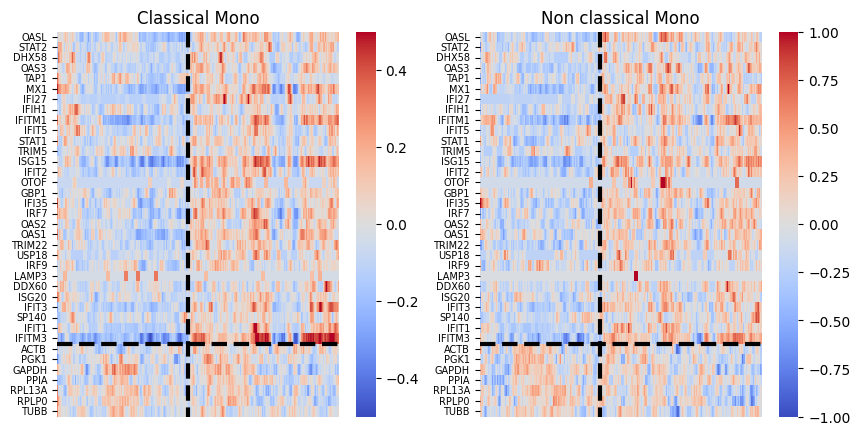

In [240]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
get_sc_fs_heatmap('Classical Mono', vmax=0.5, vmin=-0.5)
plt.subplot(1, 2, 2)
get_sc_fs_heatmap('Non classical Mono', vmax=1, vmin=-1)

plt.savefig('monocyte_isg.png', bbox_inches='tight')

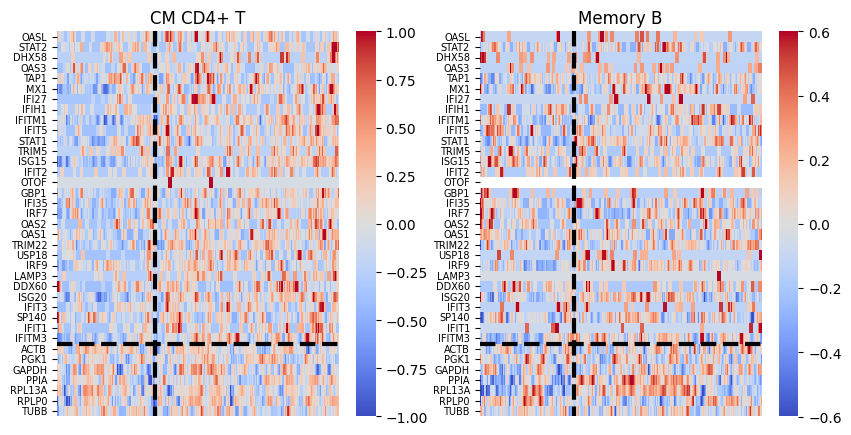

In [275]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
get_sc_fs_heatmap('CM CD4+ T', vmax=1, vmin=-1)
plt.subplot(1, 2, 2)
get_sc_fs_heatmap('Memory B', vmax=0.6, vmin=-0.6)

plt.savefig('lymphocyte_isg2.png', bbox_inches='tight')

### Lymphoma heatmap

In [241]:
selected_genes = "BLC2, BLC10, API2, MLT1, PAX5, BCL6, CCND1, MYC, REL, NFKBIA, NFKBIE, TNFAIP3, MDM2, TP53, JAK1, STAT3, STAT5B, JAK2, PTPN1, SOCS1, LMP2A, CARD11, CD79B, CD79A, EZH2, MYD88, NOTCH1, NOTCH2, TNFAIP3, TCF4, CREBBP, KMT2D, MEF2B, PAPOLG, CCND3, ID3, TCF3, ATM CCND1, BIRC3, WHSC1".split(', ')

In [242]:
ctrl_genes = ['ACTB', 'PGK1', 'GAPDH', 'PPIA', 'RPL13A', 'RPLP0', 'TUBB']
# ctrl_genes = list(np.random.choice(mdata.mod['rna'].var.index, 10))

In [243]:
selected_genes = list(set(mdata.mod['rna'].raw.var.index) & set(selected_genes)) + ctrl_genes

In [ ]:
mdata

In [245]:
expr = pd.DataFrame(
    mdata.mod['rna'][:, selected_genes].X.toarray(),
    index = mdata.obs.index,
    columns = selected_genes)
expr['ct'] = mdata.obs['annotation_merged'].tolist()
expr['fs'] = mdata.obs['fs'].clip(lower=0).tolist()
expr['siccaid'] = mdata.obs['siccaid'].tolist()
expr = expr.sort_values(['fs'])

In [246]:
ct_list = mdata.obs['annotation_merged'].value_counts().index.tolist()#mdata.obs.annotation_merged.drop_duplicates().tolist()

In [247]:
def get_sc_fs_heatmap(ct, vmin, vmax):

    num_zero = expr.query(f'ct == "{ct}" & fs == 0').shape[0]
    heatmap = expr.query(f'ct == "{ct}"')[selected_genes]
    heatmap = heatmap - heatmap.mean(axis=0)
    heatmap = heatmap / heatmap.std(axis=0)
    ma_num = int(heatmap.shape[0]/70)
    heatmap = heatmap.rolling(window=ma_num, min_periods=1).mean()
    sns.heatmap(heatmap.T, vmax=vmax, vmin=vmin, center=0, cmap='coolwarm', yticklabels=1)
    plt.plot([num_zero, num_zero], [0, len(selected_genes)], '--', color='k', lw=3)
    plt.plot([0, heatmap.shape[0]], [len(selected_genes)-len(ctrl_genes), len(selected_genes)-len(ctrl_genes)], '--', color='k', lw=3)
    plt.xticks([])
    plt.yticks(fontsize=7)
    plt.title(ct)

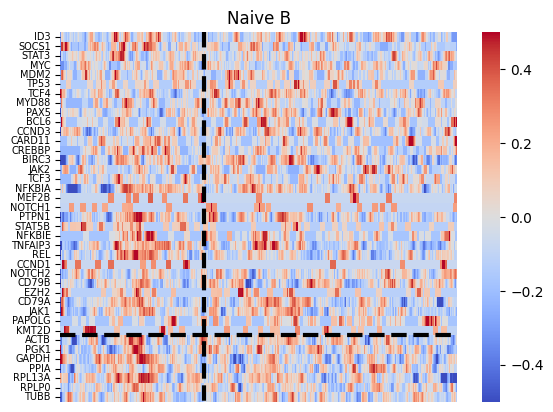

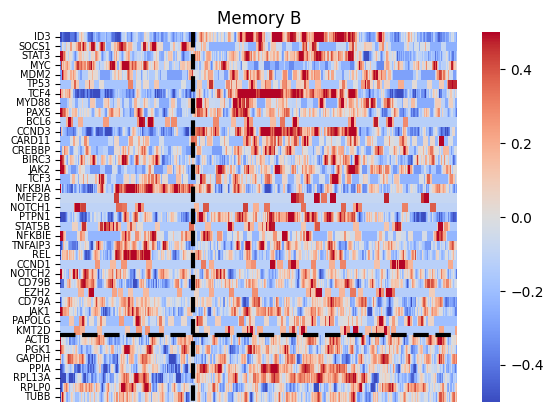

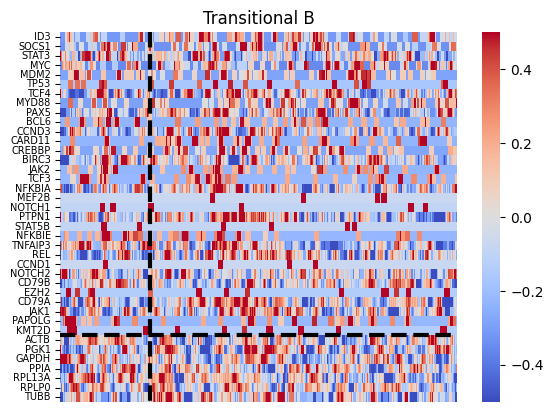

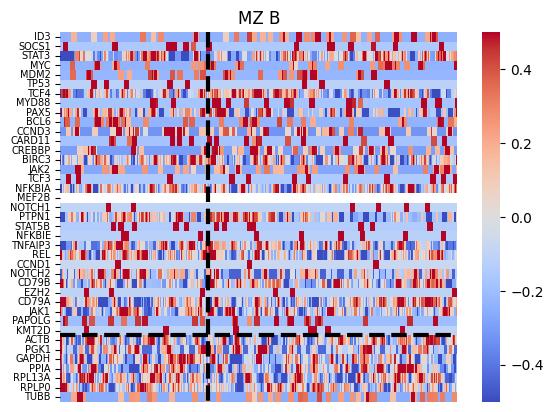

In [257]:
for ct in ct_list:

    if 'B' not in ct:
        continue
    plt.figure()
    try:
        get_sc_fs_heatmap(ct, -0.5, 0.5)
    except:
        continue

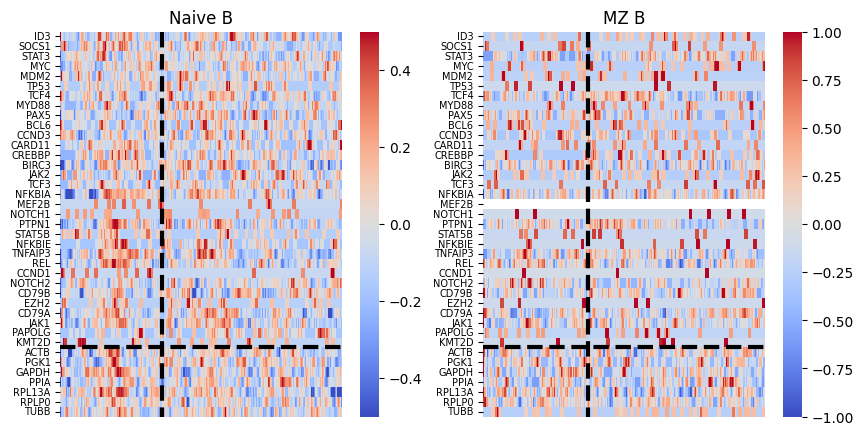

In [262]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
get_sc_fs_heatmap('Naive B', vmax=0.5, vmin=-0.5)
plt.subplot(1, 2, 2)
get_sc_fs_heatmap('MZ B', vmax=1, vmin=-1)

plt.savefig('bcell_lymphoma_genes.png', bbox_inches='tight')

### TFH heatmap

In [7]:
selected_genes = "PDCD1, CXCR5, TOX2, TRIM8, GNG4, FAM43A, BCL6, KCNK5, MYO7A, KIAA1324, CORO1B".split(', ')

In [8]:
ctrl_genes = ['ACTB', 'PGK1', 'GAPDH', 'PPIA', 'RPL13A', 'RPLP0', 'TUBB']
# ctrl_genes = list(np.random.choice(mdata.mod['rna'].var.index, 10))

In [9]:
selected_genes = list(set(mdata.mod['rna'].raw.var.index) & set(selected_genes)) + ctrl_genes

In [11]:
expr = pd.DataFrame(
    mdata.mod['rna'][:, selected_genes].X.toarray(),
    index = mdata.obs.index,
    columns = selected_genes)
expr['ct'] = mdata.obs['annotation_merged'].tolist()
expr['fs'] = mdata.obs['fs'].clip(lower=0).tolist()
expr['siccaid'] = mdata.obs['siccaid'].tolist()
expr = expr.sort_values(['fs'])

In [12]:
ct_list = mdata.obs['annotation_merged'].value_counts().index.tolist()#mdata.obs.annotation_merged.drop_duplicates().tolist()

In [13]:
def get_sc_fs_heatmap(ct, vmin, vmax):

    num_zero = expr.query(f'ct == "{ct}" & fs == 0').shape[0]
    heatmap = expr.query(f'ct == "{ct}"')[selected_genes]
    heatmap = heatmap - heatmap.mean(axis=0)
    heatmap = heatmap / heatmap.std(axis=0)
    ma_num = int(heatmap.shape[0]/70)
    heatmap = heatmap.rolling(window=ma_num, min_periods=1).mean()
    sns.heatmap(heatmap.T, vmax=vmax, vmin=vmin, center=0, cmap='coolwarm', yticklabels=1)
    plt.plot([num_zero, num_zero], [0, len(selected_genes)], '--', color='k', lw=3)
    plt.plot([0, heatmap.shape[0]], [len(selected_genes)-len(ctrl_genes), len(selected_genes)-len(ctrl_genes)], '--', color='k', lw=3)
    plt.xticks([])
    plt.yticks(fontsize=7)
    plt.title(ct)

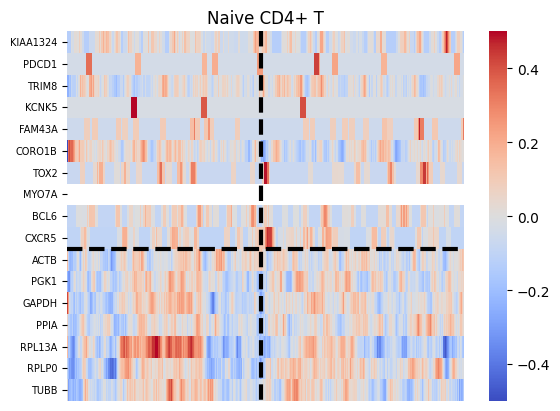

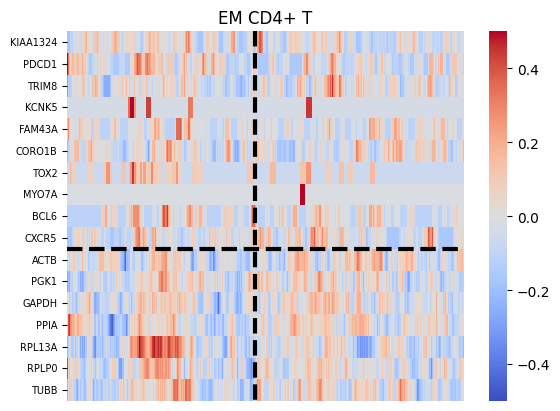

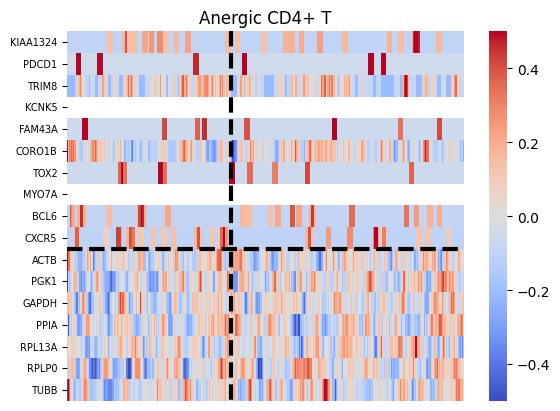

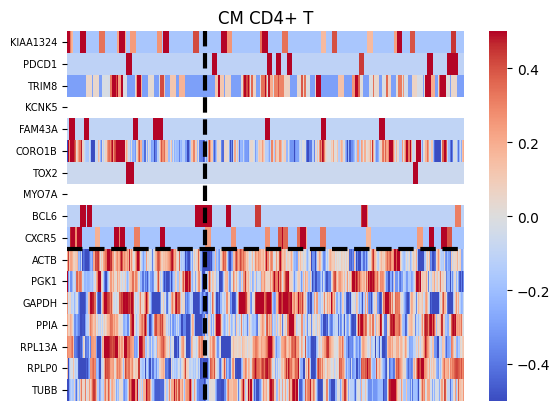

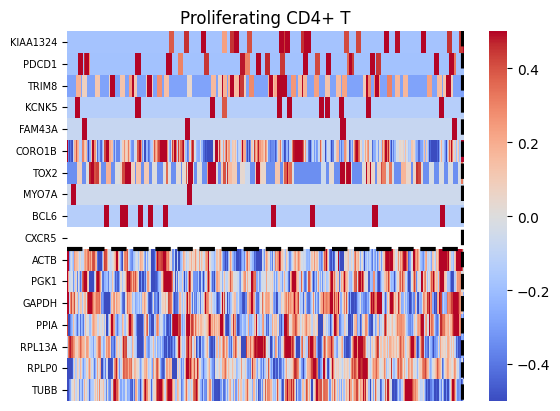

In [15]:
for ct in ct_list:

    if 'CD4' not in ct:
        continue
    plt.figure()
    try:
        get_sc_fs_heatmap(ct, -0.5, 0.5)
    except:
        continue

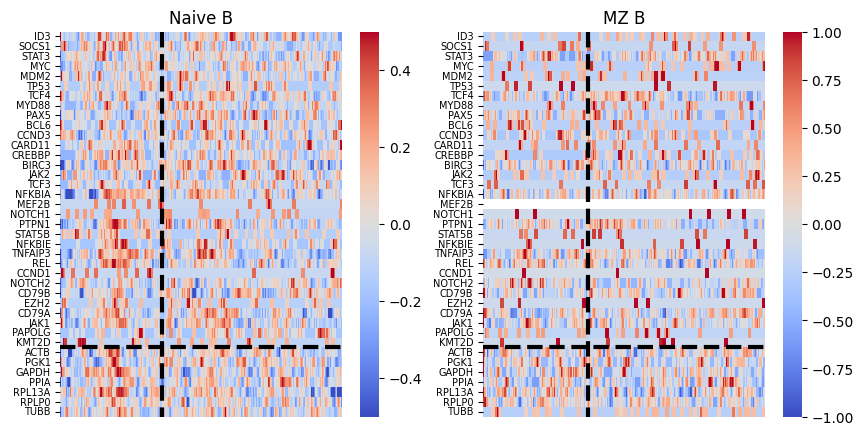

In [262]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
get_sc_fs_heatmap('Naive B', vmax=0.5, vmin=-0.5)
plt.subplot(1, 2, 2)
get_sc_fs_heatmap('MZ B', vmax=1, vmin=-1)

plt.savefig('bcell_lymphoma_genes.png', bbox_inches='tight')